<a href="https://colab.research.google.com/github/kozoB/-Electronics-Sales-Prediction/blob/main/Electronics_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electronics Sales Prediction

In this project I predict electronics sales using the "Customer purchase behavior - Electronic Sales Data" dataset from kaggle.

I also scrutiny the correaltion between different features in the dataset

## Imports

In [32]:
import numpy as np
import pandas as pd

## Get Dataset From Kaggle

In [33]:
!kaggle datasets download -d cameronseamons/electronic-sales-sep2023-sep2024

Dataset URL: https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024
License(s): MIT
electronic-sales-sep2023-sep2024.zip: Skipping, found more recently modified local copy (use --force to force download)


# Prepare Data

## Load Dataset

In [34]:
import pandas as pd

data_path = '/content/electronic-sales-sep2023-sep2024.zip'
df = pd.read_csv(data_path)

In [35]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [36]:
# Store original dataframe
orig_df = df.copy()

## Clean Data

In [37]:
# Clean NaN rows
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [38]:
# Remove unnecessary features
df.drop(columns=['Customer ID', 'SKU', 'Purchase Date', 'Add-ons Purchased'], inplace=True)

<ipython-input-38-382b869aa241>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Customer ID', 'SKU', 'Purchase Date', 'Add-ons Purchased'], inplace=True)


In [39]:
# Label encoding 'Gender' column values
df.loc[:, 'Gender'] = pd.Categorical(df['Gender']).codes

In [40]:
# Label encoding 'Order Status' column values
df.loc[:, 'Order Status'] = pd.Categorical(df['Order Status']).codes

In [41]:
# Label encoding 'Loyalty Member' column values
df.loc[:, 'Loyalty Member'] = pd.Categorical(df['Loyalty Member']).codes

In [42]:
# Label encoding 'Product Type' column values
df.loc[:, 'Product Type'] = pd.Categorical(df['Product Type']).codes

In [43]:
# Label encoding 'Payment Method' column values
df.loc[:, 'Payment Method'] = pd.Categorical(df['Payment Method']).codes

In [44]:
# Label encoding 'Shipping Type' column values
df.loc[:, 'Shipping Type'] = pd.Categorical(df['Shipping Type']).codes

In [45]:
df.head(5)

,Age,Gender,Loyalty Member,Product Type,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Shipping Type,Add-on Total
0,53,1,0,2,2,0,2,5538.33,791.19,7,4,40.21
1,53,1,0,4,3,1,5,741.09,247.03,3,2,26.09
2,41,1,1,2,2,1,1,3164.76,791.19,4,2,60.16
3,75,1,1,2,5,1,1,41.50,20.75,2,1,35.56
4,41,0,0,2,5,1,2,83.00,20.75,4,4,65.78


In [46]:
# Extract label from features
X = df.drop(columns=['Total Price'])
y = df['Total Price']

# Analyze Data

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

## Correlation Between Features

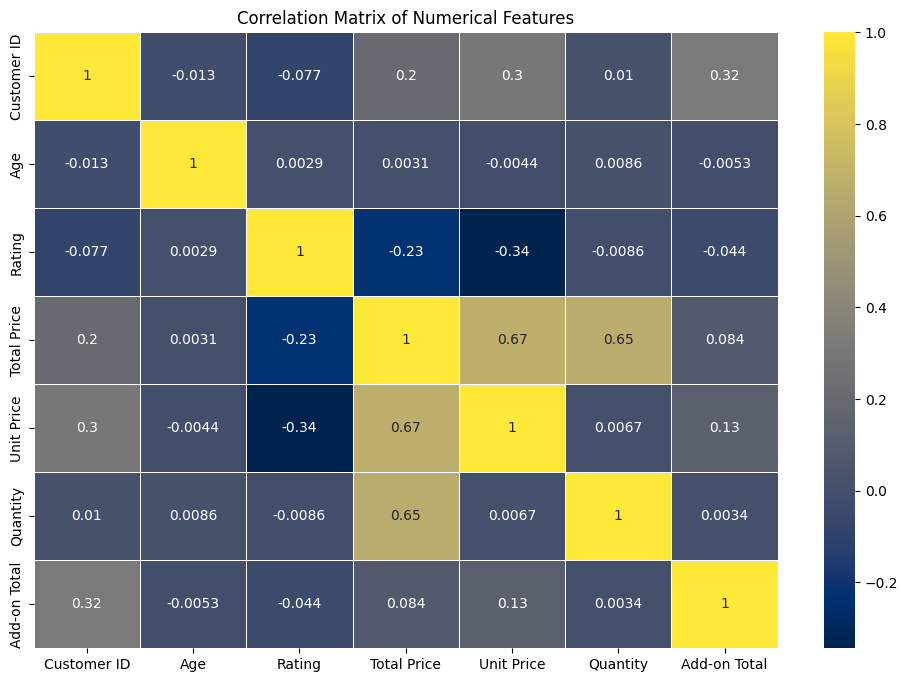

In [48]:
numeric_df = orig_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

As expected, "Total Price" has a strong positive correlation with "Unit Price" and 'Quantity'.
Other features such as 'Age', "Add-on Total" do not share a segnificant correlation with "Total Price", but there are some notable connections to consider relating to.
We can see that there is a moderate negative correlation of 0.34 between 'Rating' and "Unit Price". We can infer that customers tend to give lower ratings to items with higher prices, which means when they rate a product, they give a high value to the item's price.
As 'Rating' and "Unit Price" has a moderate connection, naturally 'Rating' and "Total Price" has a correlation as well.
moght share a correaltion with "Total Price" as well. They share a weak negative correaltion of 0.23 which points to a certain relationship between the products' rating and the transaction's total cost, meaning 'Rating' is a notable feature that is ought to be used in the models.


## Split Data To Train And Test Sets

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

## Train Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
linear_reg_model = LinearRegression()

In [53]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [54]:
predictions = linear_reg_model.predict(X_test)

# Evaluate Model

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 791200.127870093
RMSE: 889.4943101954576
MAE: 671.0856238328495
R-squared: 0.8812723505069706


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Deep Learning Model

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [57]:
num_features = X_train.shape[1]

In [58]:
num_features

11

## Build Model

In [59]:
dl_model = Sequential()

dl_model.add(Dense(64, activation='relu', input_shape=(num_features,)))
dl_model.add(Dense(32, activation='relu'))  # Hidden layer
dl_model.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

## Train Model

In [ ]:
history = dl_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10229345.0000 - val_loss: 3613496.0000
Epoch 2/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3352884.2500 - val_loss: 3486972.0000
Epoch 3/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3263395.0000 - val_loss: 3259610.0000
Epoch 4/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3065539.0000 - val_loss: 2836866.2500
Epoch 5/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2594766.2500 - val_loss: 2148205.0000
Epoch 6/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1902356.0000 - val_loss: 1408108.2500
Epoch 7/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1155524.5000 - val_loss: 799518.6250
Epoch 8/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 692065.5625 - val_loss: 517984.6875
Epoch 9/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 448848.5312 - val_loss: 409194.3438
Epoch 10/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 370819.2500 - val_loss: 370209.1875
Epoch 11/30
303/303 ━━━━━

In [ ]:
mean = y.mean()
std = y.std()
print(mean)
print(std)

3184.2618497224425
2547.8670579104605


## Plot MSE Accuracy For Train And Test Sets

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
def thousands_formatter(x, _):
    if x >= 1000:
        return f'{x/1000:.1f}'  # Format as "X.X"
    return f'{x:.0f}'  # No formatting for values less than 1000

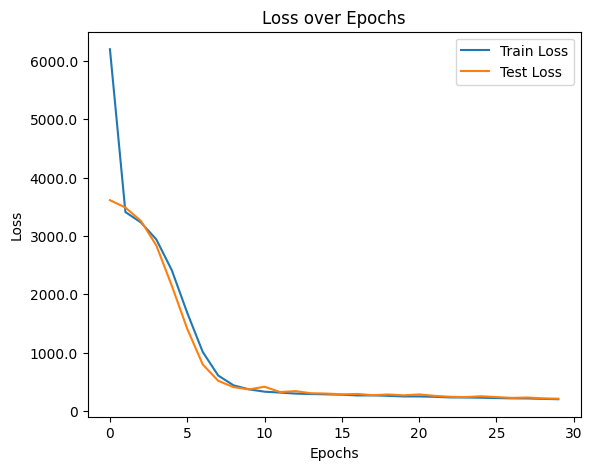

In [ ]:
# Plotting the training history
# Accuracy plot (for metrics used)
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend()
plt.show()

# Predict On Dummy Data

## Create Dummy Data Out Of Original Data

In [ ]:
df_dummy = df.iloc[0, :]

In [ ]:
df_dummy

,0
Age,53
Gender,1
Loyalty Member,0
Product Type,2
Rating,2
Order Status,0
Payment Method,2
Total Price,5538.33
Unit Price,791.19
Quantity,7


## Set New Values To Dummy Data

In [ ]:
dummy_y = df_dummy['Total Price']
dummy_x = df_dummy.drop('Total Price')

dummy_x['Age'] = 24
dummy_x['Gender'] = 1
dummy_x['Loyalty Member'] = 0
dummy_x['Product Type'] = 1
dummy_x['Rating'] = 2
dummy_x['Order Status'] = 0
dummy_x['Payment Method'] = 1
dummy_x['Unit Price'] = 1252.90
dummy_x['Quantity'] = 5
dummy_x['Shipping Type'] = 3
dummy_x['Add-on Total'] = 67.4

In [ ]:
dummy_x

,0
Age,24
Gender,1
Loyalty Member,0
Product Type,1
Rating,2
Order Status,0
Payment Method,1
Unit Price,1252.9
Quantity,5
Shipping Type,3


## Prepare Dummy Data For Prediction

In [ ]:
# Convert to NumPy array with a specific dtype if necessary
dummy_x_array = np.array(dummy_x, dtype=np.float32)  # or np.float64, depending on your model
dummy_x_array = dummy_x_array.reshape(1, -1)

In [ ]:
print("Reshaped input shape:", dummy_x_array.shape)  # Should output (1, 11)

Reshaped input shape: (1, 11)


## Actual Total Price

In [ ]:
act_total_price = dummy_x['Unit Price'] * dummy_x['Quantity']
print(f'Actual Total Price: {act_total_price}')

Actual Total Price: 6264.5


## DL Model Prediction

In [ ]:
pred = dl_model.predict(dummy_x_array)
print(f'Predicted Total Price: {pred}')
print(f'Difference: {abs(pred-act_total_price)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Total Price: [[6276.851]]
Difference: [[12.351074]]


## Linear Regression Model Prediction

In [ ]:
pred = linear_reg_model.predict(dummy_x_array)
print(f'Predicted Total Price: {pred}')
print(f'Difference: {abs(pred-act_total_price)}')

Predicted Total Price: [6547.40749556]
Difference: [282.90749556]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Reduced Features

This time I will try using only 3 features as inputs for the models - "Unit Price", 'Quantity' and 'Rating'

In [64]:
df_reduced = df[['Unit Price', 'Quantity', 'Rating', 'Total Price']]

In [65]:
df_reduced.head()

,Unit Price,Quantity,Rating,Total Price
0,791.19,7,2,5538.33
1,247.03,3,3,741.09
2,791.19,4,2,3164.76
3,20.75,2,5,41.50
4,20.75,4,5,83.00


In [66]:
# Extract label from features
X = df_reduced.drop(columns=['Total Price'])
y = df_reduced['Total Price']

In [24]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_reg_model = LinearRegression()

In [73]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [74]:
predictions = linear_reg_model.predict(X_test)

## Evaluate Linear Regression Model

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 790709.0490299199
RMSE: 889.2182235142957
MAE: 671.3916658726869
R-squared: 0.881346041895983


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


As we can see that the results for the Linear Regression Model with reduced features data is similar to the results of the same model with more features in the data.

# Train Deep Learning Model

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [76]:
num_features = X_train.shape[1]

In [77]:
num_features

3

## Build DL Model

In [78]:
dl_model = Sequential()

dl_model.add(Dense(64, activation='relu', input_shape=(num_features,)))
dl_model.add(Dense(32, activation='relu'))  # Hidden layer
dl_model.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [80]:
history = dl_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11711006.0000 - val_loss: 3648707.7500
Epoch 2/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3447481.2500 - val_loss: 3600478.2500
Epoch 3/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3514826.7500 - val_loss: 3546682.2500
Epoch 4/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3435275.0000 - val_loss: 3496835.2500
Epoch 5/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3322867.7500 - val_loss: 3419810.5000
Epoch 6/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3286181.2500 - val_loss: 3334634.5000
Epoch 7/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3156541.2500 - val_loss: 3222790.7500
Epoch 8/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3130107.7500 - val_loss: 3080463.0000
Epoch 9/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2863659.2500 - val_loss: 2826710.7500
Epoch 10/30
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2607538.2500 - val_loss: 2415592.2500
Epoch 11/30
303/30

In [81]:
mean = y.mean()
std = y.std()
print(mean)
print(std)

3184.2618497224425
2547.8670579104605


The results are the same meaning reducing the features number to only those who have the highest correlation to "Total Price" did not help the model to converge better